# Assignment_12_Decision_Tree (Company_Data)

Decision Tree

Assignment


About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
Comp_D = pd.read_csv("/content/Company_Data.csv")
Comp_D.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


EDA

In [2]:
Comp_D.shape

(400, 11)

In [3]:
Comp_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
Comp_D.index

RangeIndex(start=0, stop=400, step=1)

In [6]:
Comp_D.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
Comp_D.corr()   # correlation

<ipython-input-7-9ecf696d65ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Comp_D.corr()   # correlation


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
Comp_D.isna().sum()
# Or
# Comp_D.isna().any()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
Comp_D['Sales'].mean()  # Mean of sales values

7.496325000000001

In [10]:
# to convert continuous variables into categorical variable use for loop, sales<=7.49 = Low, sales>7.49 = High
sales_val = []
for value in Comp_D["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")

Comp_D["sales_val"]=sales_val

In [11]:
Comp_D['sales_val']

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [12]:
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [13]:
Comp_D.drop('Sales', axis = 1, inplace = True)

In [14]:
Comp_D.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

 Visualization

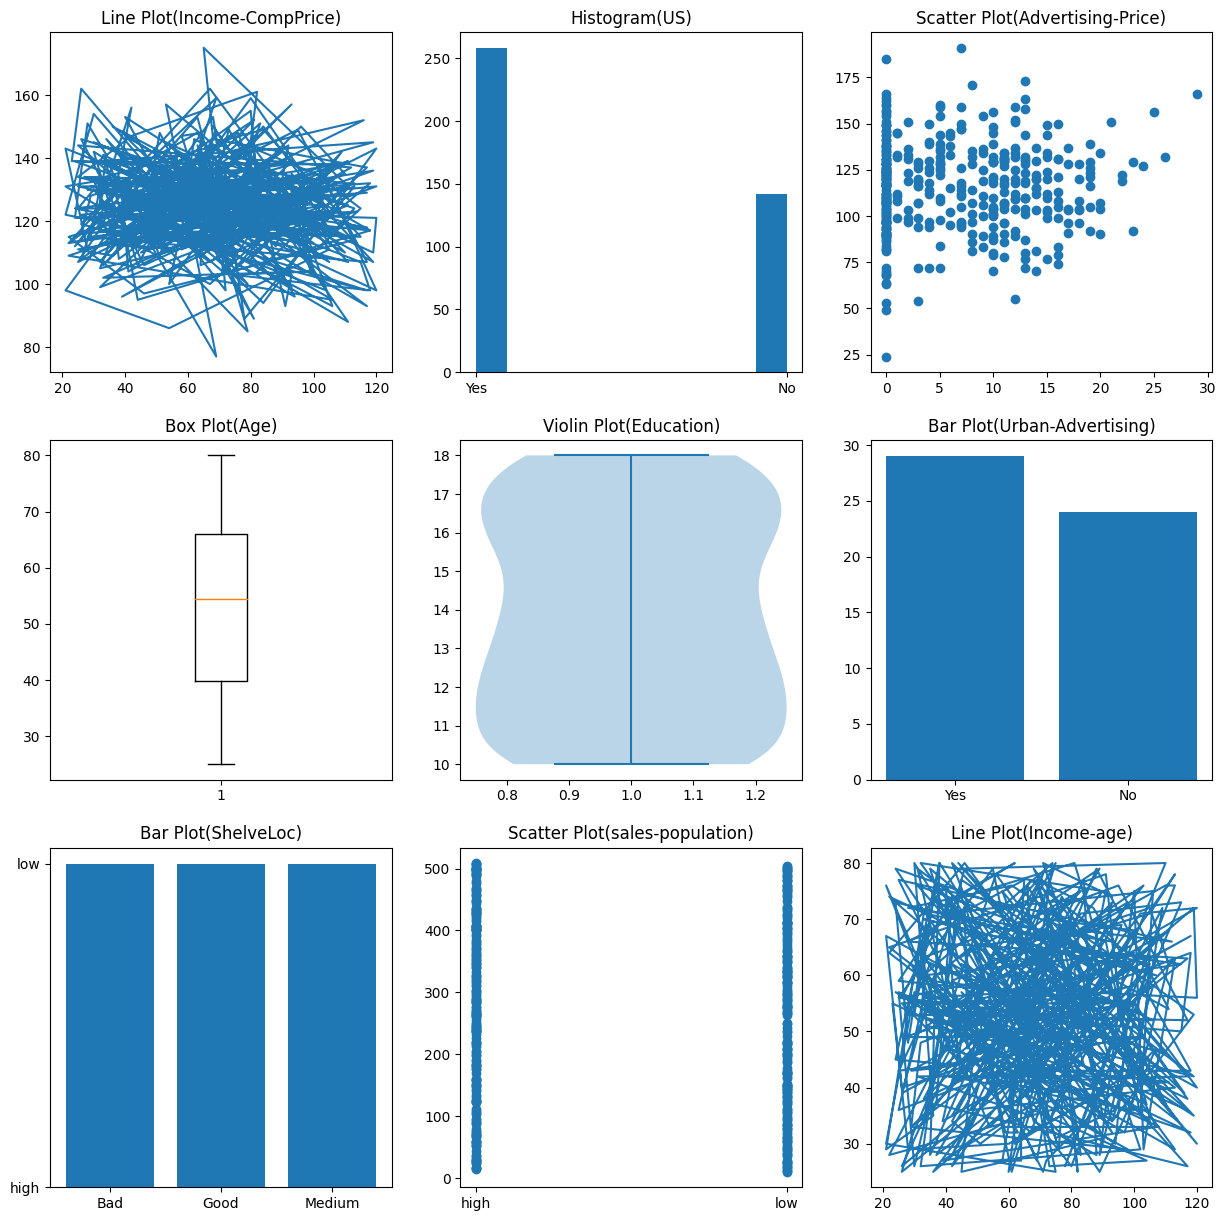

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Income','CompPrice', data = Comp_D);ax[0,0].set_title("Line Plot(Income-CompPrice)")
ax[0,1].hist('US', data = Comp_D);ax[0,1].set_title("Histogram(US)")
ax[0,2].scatter('Advertising', 'Price', data = Comp_D);ax[0,2].set_title("Scatter Plot(Advertising-Price)")
ax[1,0].boxplot('Age', data = Comp_D);ax[1,0].set_title("Box Plot(Age)")
ax[1,1].violinplot('Education', data = Comp_D);ax[1,1].set_title("Violin Plot(Education)")
ax[1,2].bar('Urban','Advertising', data = Comp_D);ax[1,2].set_title("Bar Plot(Urban-Advertising)")
ax[2,0].bar(Comp_D['ShelveLoc'], Comp_D["sales_val"]);ax[2,0].set_title("Bar Plot(ShelveLoc)")
ax[2,1].scatter('sales_val','Population', data = Comp_D);ax[2,1].set_title("Scatter Plot(sales-population)")
ax[2,2].plot('Income','Age', data = Comp_D);ax[2,2].set_title("Line Plot(Income-age)")
plt.show()

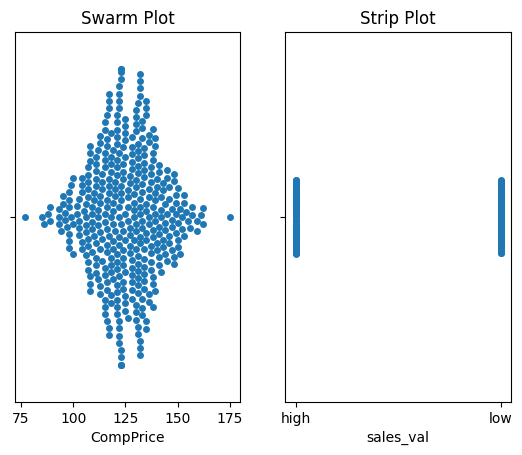

In [17]:
plt.subplot(1,2,1)
sns.swarmplot(x='CompPrice', data=Comp_D)  # Specify 'x' instead of using positional argument
plt.title("Swarm Plot")

plt.subplot(1,2,2)
sns.stripplot(x='sales_val', data=Comp_D)  # Specify 'x' instead of using positional argument
plt.title("Strip Plot")

plt.show()


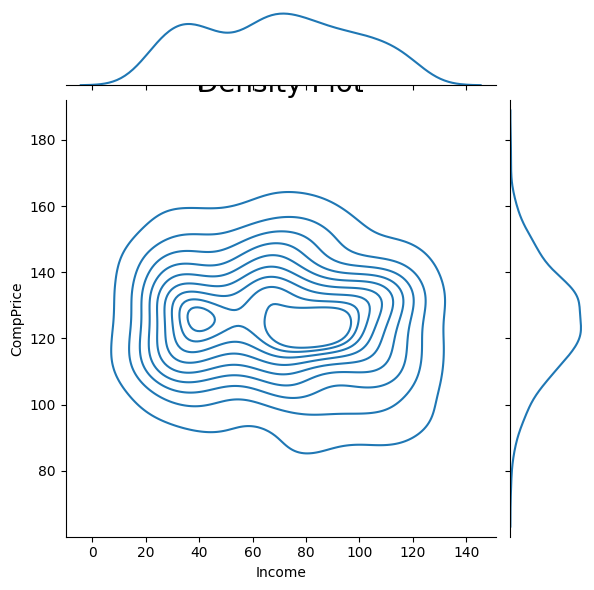

In [19]:
sns.jointplot(x='Income', y='CompPrice', data=Comp_D, kind='kde')
plt.title("Density Plot", size=20)
plt.show()


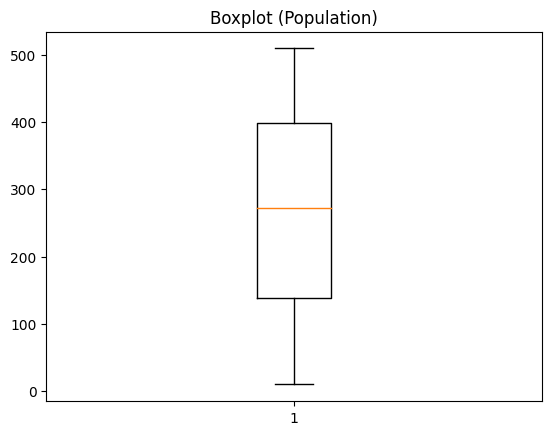

In [20]:
# Boxplot for outlier detection
plt.boxplot(Comp_D['Population']); plt.title("Boxplot (Population)")
plt.show()

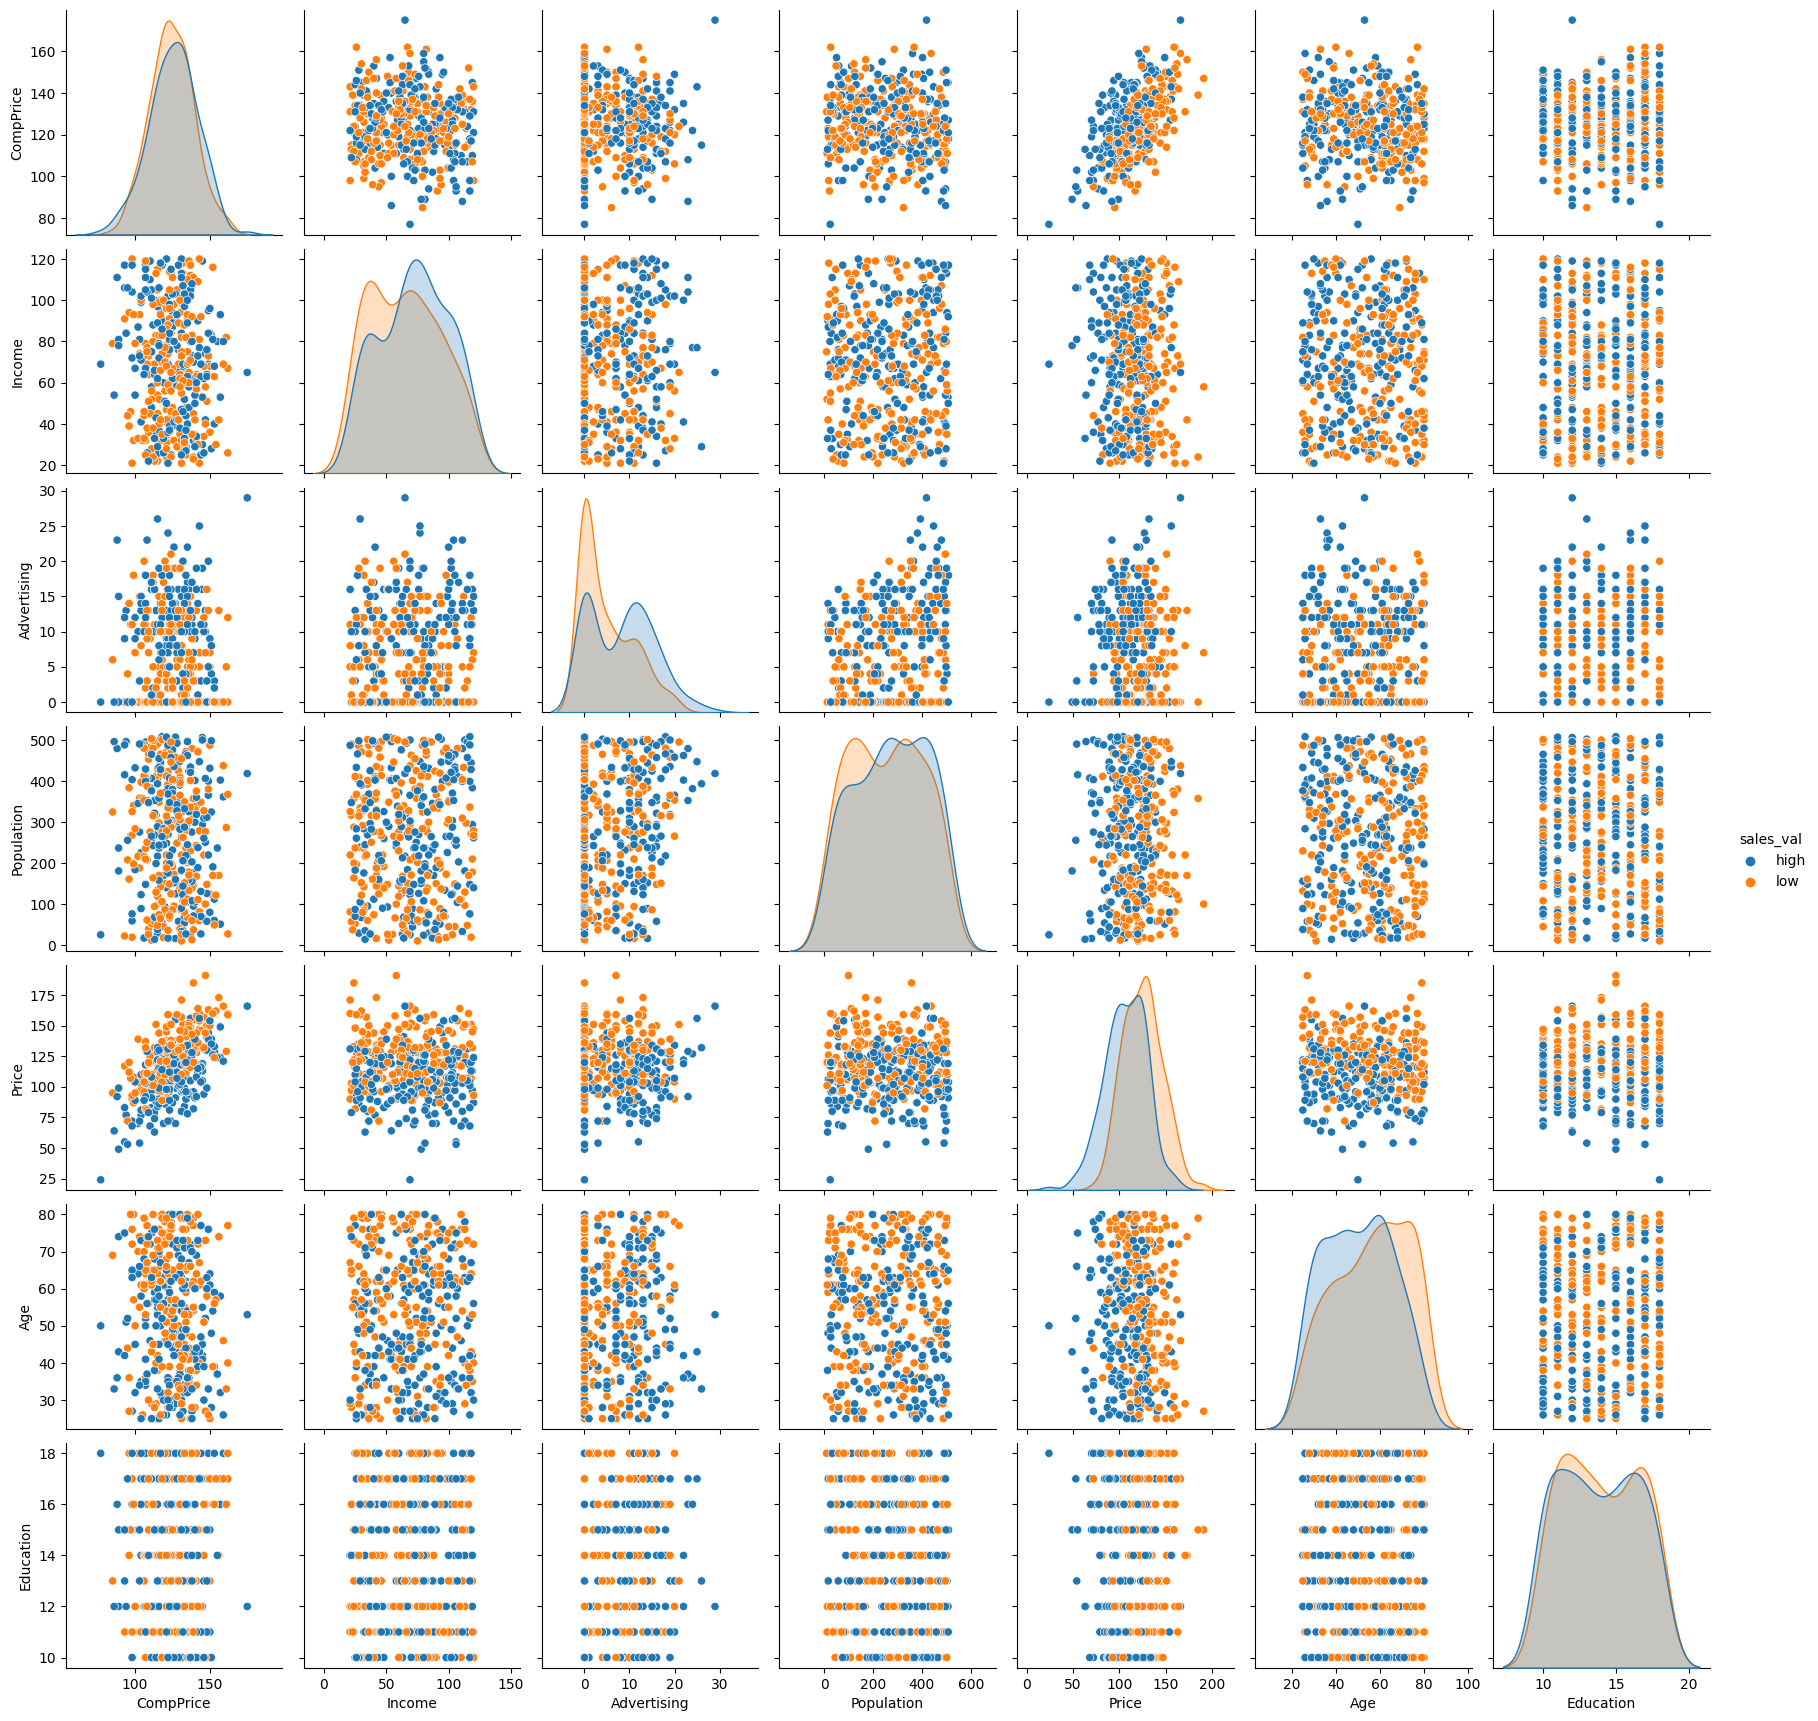

In [21]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data= Comp_D, hue = 'sales_val' )
plt.show()

In [22]:
print(Comp_D['US'].unique())
print(Comp_D['ShelveLoc'].unique())
print(Comp_D['Urban'].unique())
print(Comp_D['sales_val'].unique())

['Yes' 'No']
['Bad' 'Good' 'Medium']
['Yes' 'No']
['high' 'low']


In [23]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Comp_D['US'] = LE.fit_transform(Comp_D['US'])
Comp_D['ShelveLoc'] = LE.fit_transform(Comp_D['ShelveLoc'])
Comp_D['Urban'] = LE.fit_transform(Comp_D['Urban'])
Comp_D['sales_val'] = LE.fit_transform(Comp_D['sales_val'])

# OR
#Creating dummy vairables dropping first dummy variable
#Comp_D=pd.get_dummies(Comp_D,columns=['Urban','US'], drop_first=True)

In [24]:
print(Comp_D['US'].value_counts())
print(Comp_D['ShelveLoc'].value_counts())
print(Comp_D['Urban'].value_counts())
print(Comp_D['sales_val'].value_counts())

1    258
0    142
Name: US, dtype: int64
2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
1    282
0    118
Name: Urban, dtype: int64
1    201
0    199
Name: sales_val, dtype: int64


In [25]:
Comp_D.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

# Model Building, Training, Testing

In [26]:
x = Comp_D.iloc[:,:-1]
y = Comp_D.iloc[:,-1]
# OR  y = sales_val
#print(x)
#print(y)

In [27]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
model

DecisionTreeClassifier(max_depth=3)

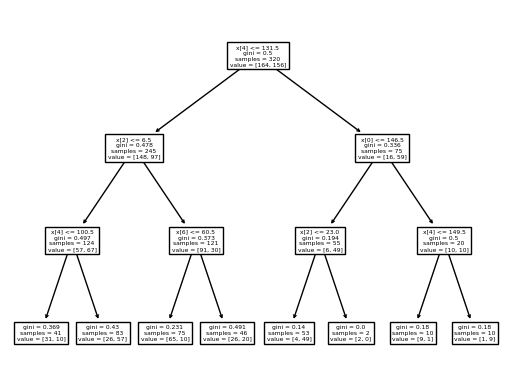

In [30]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [31]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

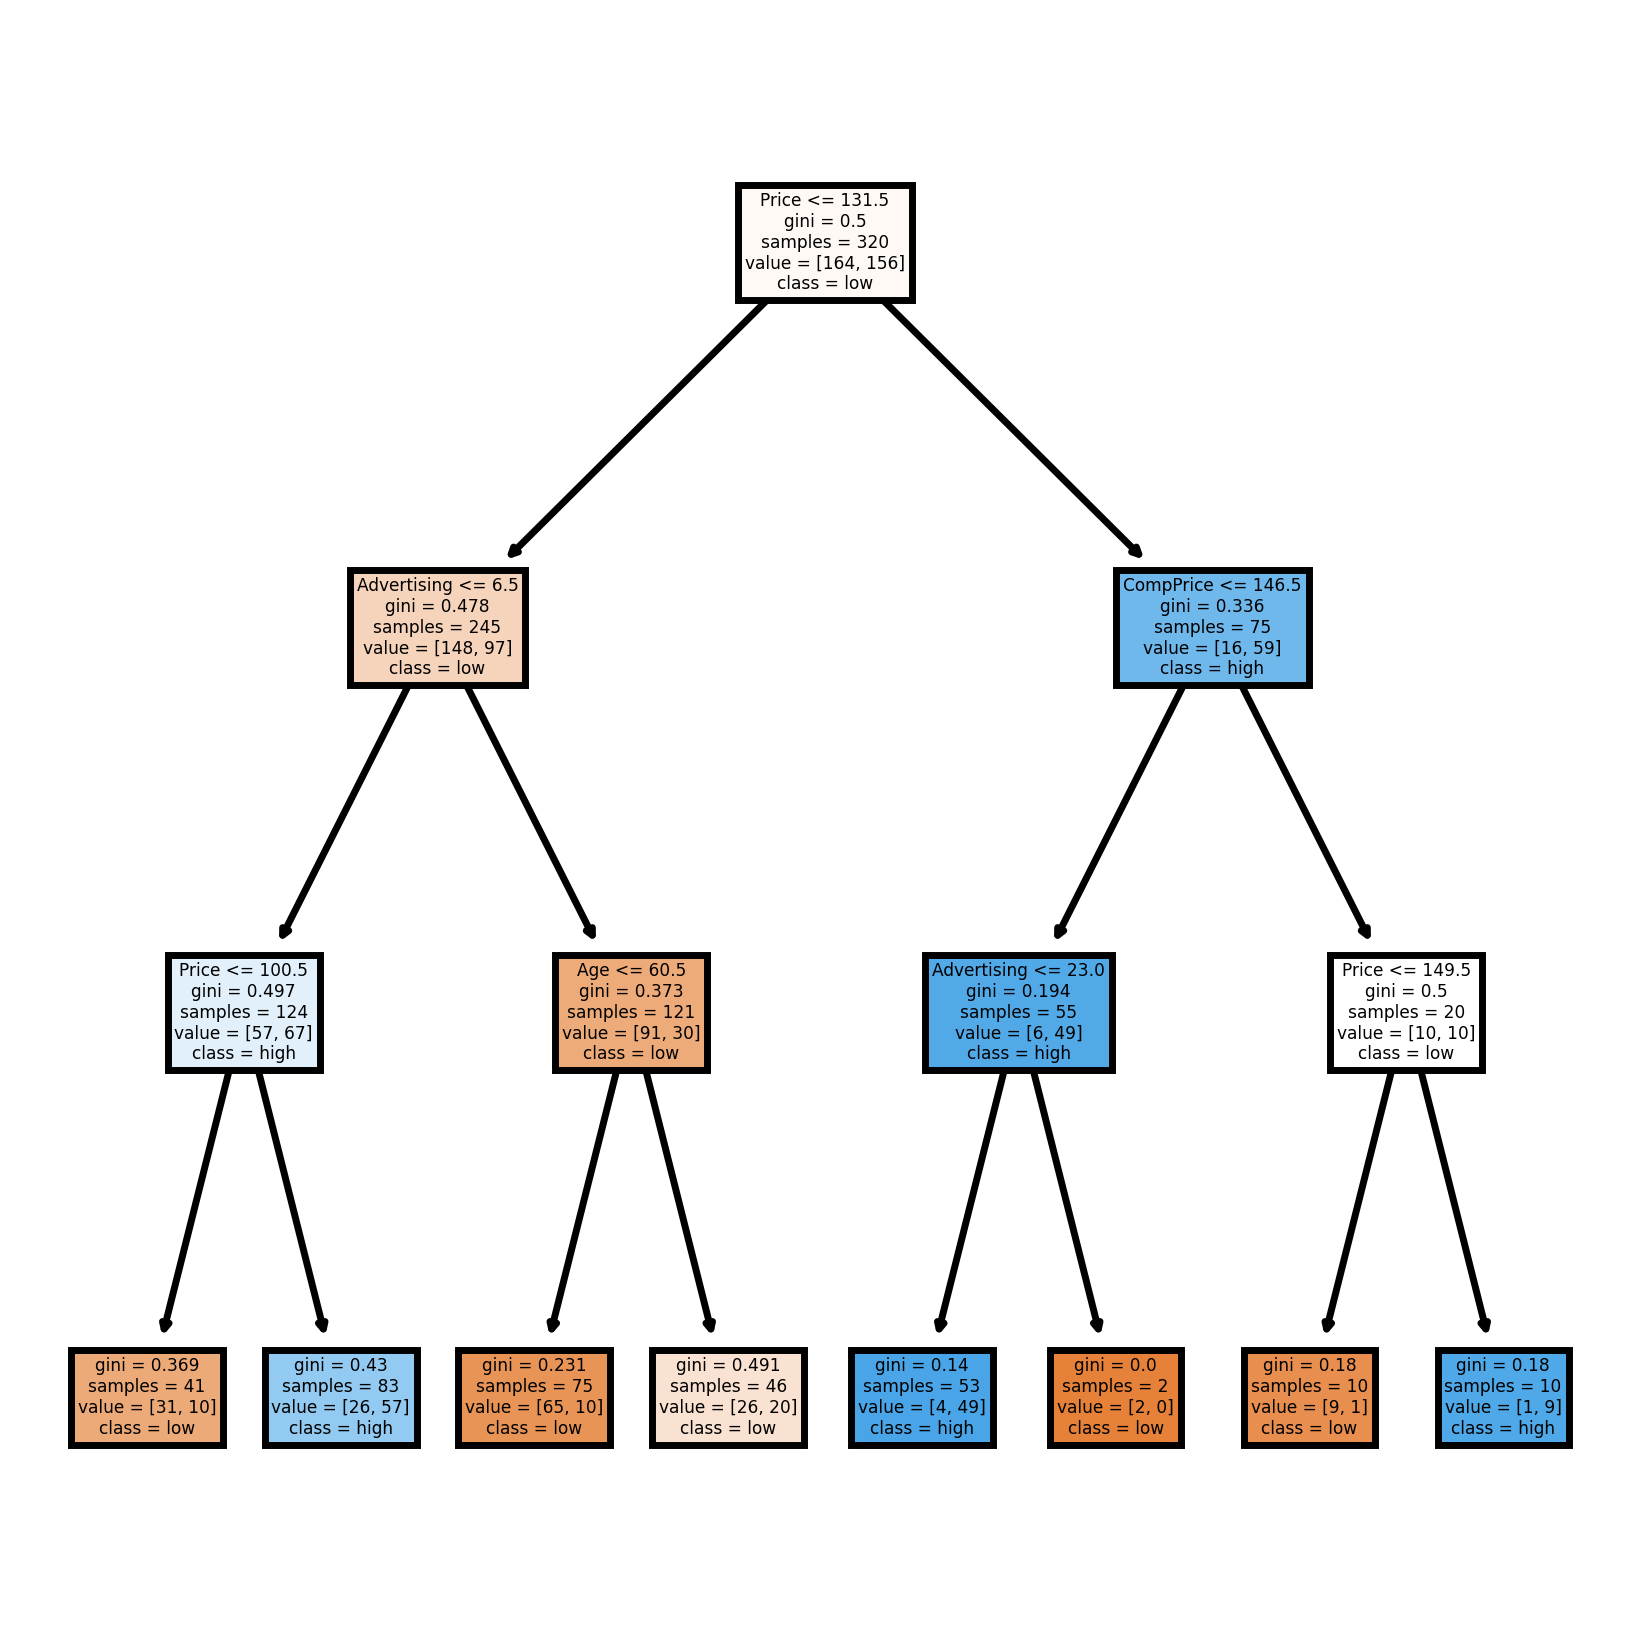

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']   # Columns
cn = ['low', 'high']   # value_counts.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [33]:
# predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

0    42
1    38
dtype: int64

In [34]:
y_test.value_counts()

1    45
0    35
Name: sales_val, dtype: int64

In [35]:
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [36]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
sales_val,,
0,27,8
1,15,30


In [37]:
preds, y_test

(array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]),
 132    0
 390    1
 310    0
 3      1
 248    1
       ..
 361    0
 197    1
 23     1
 54     1
 58     1
 Name: sales_val, Length: 80, dtype: int64)

In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds==y_test), accuracy_score(y_test, preds)

(0.7125, 0.7125)

**Building** **Decision** **tree** **Classifier** (**CART**) **using** **Gini** **Criteria**

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.7125

Decision Tree Regression Example

In [42]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = Comp_D.values
X = array[:,:-1]
Y = array[:,-1]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
# Find the accuracy
model.score(X_test, Y_test)

-0.21239954075774992

# Logistic Regression

In [48]:
# Dividing dataset into input and output
X = Comp_D.iloc[:,:-1]
Y = Comp_D.iloc[:,-1]
print(X)
print(Y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [49]:
from sklearn.linear_model import LogisticRegression
import pickle

In [50]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [52]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [53]:
y_pred_Comp_D = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [54]:
y_pred_Comp_D

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
395,0,0
396,1,0
397,1,0
398,1,1


In [55]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[158  41]
 [ 32 169]]


In [56]:
((158+170)/(158+41+31+170))*100

82.0

In [57]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       199
           1       0.80      0.84      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



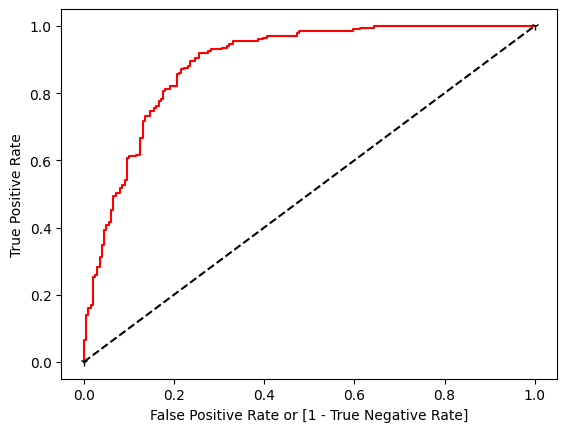

In [58]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [59]:
auc    # Accuracy

0.8173829345733643

**KNN** **Classification**

In [60]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [61]:
kfold = KFold(n_splits = 10)

In [62]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

[0.625 0.75  0.475 0.575 0.4   0.7   0.55  0.575 0.5   0.55 ]
Accuracy is: 0.5700000000000001


In [63]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [64]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [66]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [67]:
print(grid.best_score_)

0.6300000000000001


# SVM

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [69]:
Comp_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales_val    400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [71]:
# Dividing dataset into input and output
X = Comp_D.iloc[:100,:-1]
Y = Comp_D.iloc[:100,-1]
print(X)
print(Y)

    CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0         138      73           11         276    120          0   42   
1         111      48           16         260     83          1   65   
2         113      35           10         269     80          2   59   
3         117     100            4         466     97          2   55   
4         141      64            3         340    128          0   38   
..        ...     ...          ...         ...    ...        ...  ...   
95        134      25           10         237    148          2   59   
96        147      42           10         407    132          1   73   
97        161      82            5         287    129          0   33   
98        122      77           24         382    127          1   36   
99        121      47            3         220    107          0   56   

    Education  Urban  US  
0          17      1   1  
1          10      1   1  
2          12      1   1  
3          14  

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [73]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 10), (30, 10), (70,), (30,))

In [74]:
#  Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   2.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   2.3s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.857 total time=   9.2s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   2.2s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.857 total time=   0.7s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [75]:
gsv.best_params_, gsv.best_score_

({'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}, 0.8714285714285713)

In [76]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)

Accuracy is:  73.33333333333333


array([[15,  1],
       [ 7,  7]])